# Lab 1

Juan Angel Carrera 20593

Esteban Aldana Guerra 20591

José Mariano Reyes 20074

## Task 1

### 1. ¿Qué pasa si algunas acciones tienen probabilidades de cero?

Si algunas acciones tienen probabilidades de cero en una política, significa que esas acciones nunca serán seleccionadas por el agente. Esto puede tener varias implicaciones:

Reducción del espacio de exploración: El agente nunca explorará esas acciones, lo que podría llevar a perder oportunidades potencialmente beneficiosas.
Posible suboptimalidad: Si una acción con probabilidad cero es en realidad la mejor acción en algún estado, el agente nunca aprenderá a utilizarla, llevando a un rendimiento subóptimo.
Problemas de convergencia: En algunos algoritmos de aprendizaje por refuerzo, las probabilidades de cero pueden causar problemas de convergencia o división por cero en cálculos.


### 2. ¿Qué pasa si la política es determinística?
### a. π₁(a) = 1 para algún a

Cuando la política es determinística, significa que para cada estado, el agente siempre elige la misma acción con certeza. En el caso específico donde π₁(a) = 1 para alguna acción a:

No hay exploración: El agente siempre seleccionará la acción a en ese estado, sin explorar otras opciones.
Explotación pura: El agente solo explota el conocimiento actual sin buscar mejores alternativas.
Posible estancamiento: Si la acción elegida no es óptima, el agente no podrá mejorar su política.
Simplificación de cálculos: En algunos algoritmos, una política determinística puede simplificar cálculos al eliminar la necesidad de considerar múltiples acciones posibles.

### 3. Investigue y defina a qué se le conoce como cada uno de los siguientes términos, asegúrese de definir en qué consiste cada una de estas variaciones y cómo difieren de los k-armed bandits

#### a. Contextual bandits:
Los contextual bandits son una variación del problema de k-armed bandits donde el agente recibe información contextual antes de tomar una decisión.
Características principales:

- Se proporciona un contexto o característica antes de cada decisión.
- Las recompensas dependen tanto de la acción elegida como del contexto.
- El agente debe aprender a asociar contextos con acciones óptimas.

En los k-armed bandits estándar, no hay información contextual y las recompensas solo dependen de la acción elegida.

#### b. Dueling bandits:
Los dueling bandits son una variación donde el agente compara pares de acciones en lugar de seleccionar una única acción en cada iteración.
Características principales:

- El agente selecciona dos acciones en cada iteración.
- Recibe feedback sobre cuál de las dos acciones es preferible.
- El objetivo es identificar la mejor acción global a través de comparaciones por pares.

En los k-armed bandits estándar, se selecciona y evalúa una sola acción a la vez, mientras que en dueling bandits se comparan pares de acciones.

#### c. Combination bandits:
Los combination bandits (también conocidos como combination bandits) son una variación donde el agente selecciona una combinación de acciones en lugar de una sola acción.
Características principales:

- El espacio de acción consiste en combinaciones de elementos básicos.
- El agente debe seleccionar un subconjunto de acciones en cada iteración.
- Las recompensas dependen de la combinación completa seleccionada.

En los k-armed bandits estándar, se selecciona una única acción de un conjunto fijo, mientras que en combination bandits se seleccionan múltiples acciones o una combinación de ellas.

## Task 2

Total accumulated reward: 805


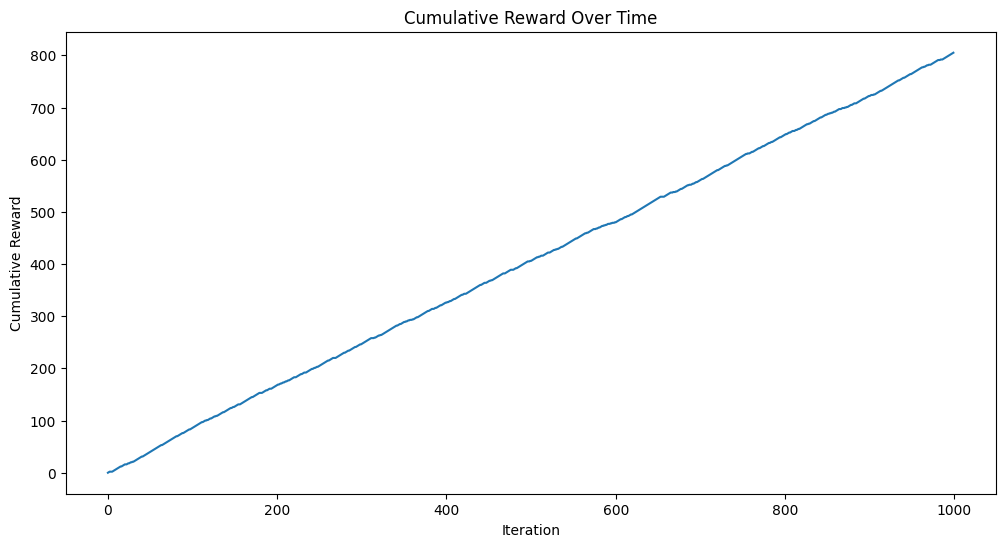

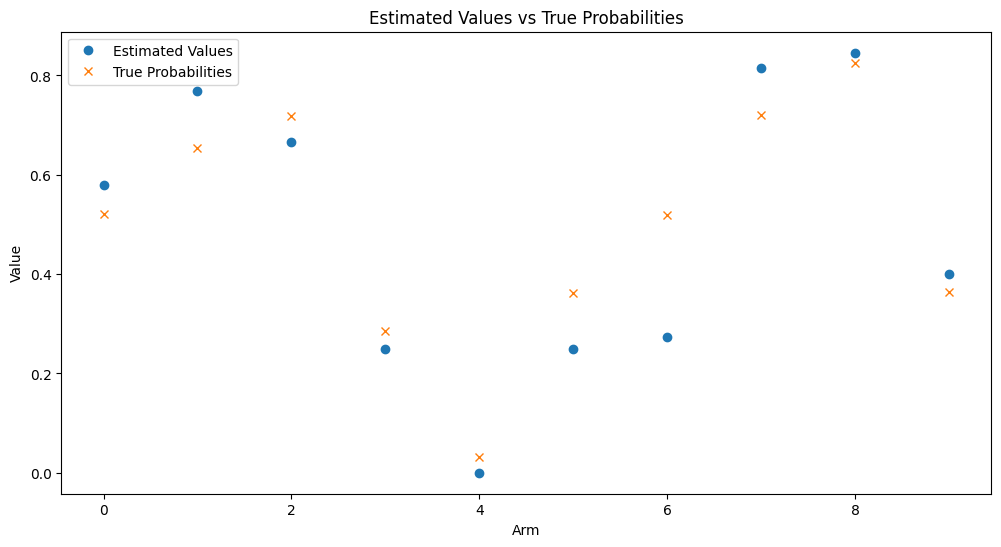

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, n_arms=10):
        self.n_arms = n_arms
        self.probabilities = np.random.rand(n_arms)

    def pull(self, arm):
        return 1 if np.random.rand() < self.probabilities[arm] else 0

class Agent:
    def __init__(self, n_arms=10, epsilon=0.1):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.estimates = np.zeros(n_arms)
        self.counts = np.zeros(n_arms)

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.estimates)

    def update_estimates(self, arm, reward):
        self.counts[arm] += 1
        self.estimates[arm] += (reward - self.estimates[arm]) / self.counts[arm]

# Initialize Bandit and Agent
bandit = Bandit()
agent = Agent(epsilon=0.1)

# Run simulation for 1,000 iterations
n_iterations = 1000
total_reward = 0
cumulative_rewards = []

for _ in range(n_iterations):
    arm = agent.select_arm()
    reward = bandit.pull(arm)
    agent.update_estimates(arm, reward)
    total_reward += reward
    cumulative_rewards.append(total_reward)

# Print total accumulated reward
print("Total accumulated reward:", total_reward)

# Plot cumulative rewards
plt.figure(figsize=(12, 6))
plt.plot(cumulative_rewards)
plt.xlabel("Iteration")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Over Time")
plt.show()

# Plot estimated values vs true probabilities
plt.figure(figsize=(12, 6))
plt.plot(agent.estimates, 'o', label="Estimated Values")
plt.plot(bandit.probabilities, 'x', label="True Probabilities")
plt.xlabel("Arm")
plt.ylabel("Value")
plt.title("Estimated Values vs True Probabilities")
plt.legend()
plt.show()